In [13]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [14]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [15]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [16]:
dataset = tf.keras.preprocessing. image_dataset_from_directory(
"/Users/nihalkumar/Downloads/potato_diseases",
shuffle=True,
image_size = (IMAGE_SIZE, IMAGE_SIZE),
batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [17]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [18]:
len(dataset)

68

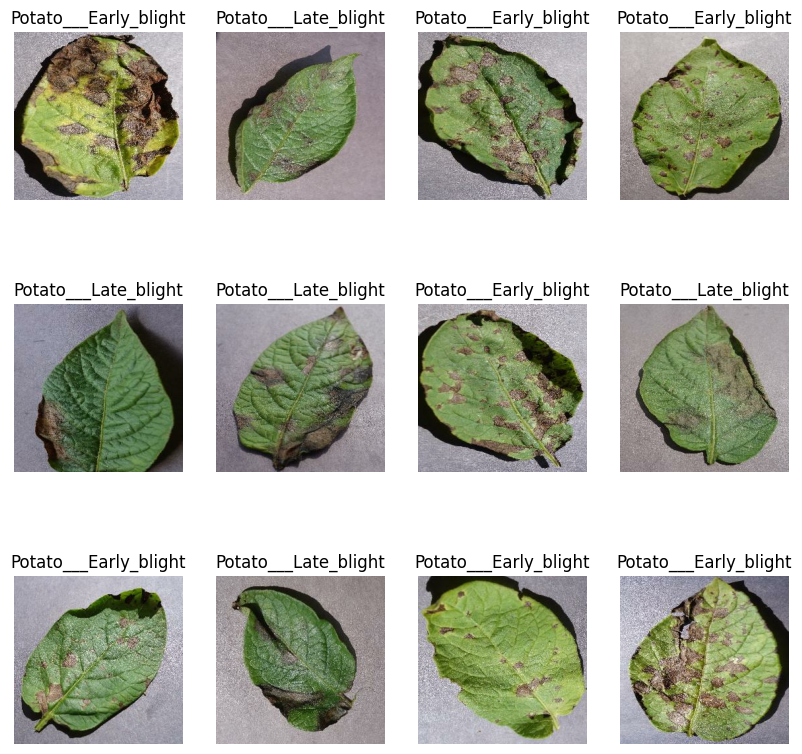

In [19]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take (1):
 for i in range(12):
  ax = plt.subplot (3,4, i+1)
  plt.imshow( image_batch[i].numpy().astype("uint8"))
  plt.title(class_names[label_batch[i]])
  plt.axis ("off")

In [20]:
train_size = 0.8
len (dataset)*train_size

54.400000000000006

In [21]:
train_ds= dataset. take (54)
len (train_ds)

54

In [22]:
test_ds = dataset. skip (54)
len (test_ds)

14

In [23]:
val_ds = test_ds. take(6)
len (val_ds)

6

In [24]:
test_ds = test_ds. skip(6)
len (test_ds)

8

In [25]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=1000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    test_size = int(test_split * ds_size)  # Add test_size calculation
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size).take(test_size)  # Fix test_ds calculation

    return train_ds, val_ds, test_ds


In [26]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [27]:
train_ds = train_ds.cache(). shuffle(1000). prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds. cache(). shuffle(1000). prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache(). shuffle(1000) .prefetch(buffer_size=tf.data.AUTOTUNE)

In [28]:
resize_and_rescale = tf.keras.Sequential ([
layers. experimental. preprocessing. Resizing (IMAGE_SIZE, IMAGE_SIZE), layers. experimental. preprocessing. Rescaling(1.0/255)
])

In [29]:
data_augmentation = tf.keras.Sequential([
layers. experimental.preprocessing. RandomFlip("horizontal_and_vertical"), layers.experimental. preprocessing. RandomRotation(0.2),
])                    

In [30]:
from tensorflow.keras import models, layers



input_shape = (BATCH_SIZE ,IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape=input_shape)

# Optional: Print the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [31]:
model.compile(
optimizer='adam',
loss=tf. keras. losses. SparseCategoricalCrossentropy (from_logits=False), metrics=['accuracy']
)

In [32]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,  # Corrected the comma to separate arguments
    validation_data=val_ds
)


Epoch 1/50
54/54 [==============================] - 34s 613ms/step - loss: 0.7735 - accuracy: 0.6678 - val_loss: 0.5236 - val_accuracy: 0.8281
Epoch 2/50
54/54 [==============================] - 34s 639ms/step - loss: 0.5134 - accuracy: 0.8229 - val_loss: 0.4632 - val_accuracy: 0.8229
Epoch 3/50
54/54 [==============================] - 36s 663ms/step - loss: 0.3553 - accuracy: 0.8553 - val_loss: 0.3547 - val_accuracy: 0.8438
Epoch 4/50
54/54 [==============================] - 35s 645ms/step - loss: 0.2834 - accuracy: 0.8773 - val_loss: 0.3659 - val_accuracy: 0.8333
Epoch 5/50
54/54 [==============================] - 35s 657ms/step - loss: 0.2447 - accuracy: 0.9039 - val_loss: 0.2615 - val_accuracy: 0.9010
Epoch 6/50
54/54 [==============================] - 35s 656ms/step - loss: 0.1896 - accuracy: 0.9329 - val_loss: 0.4411 - val_accuracy: 0.8281
Epoch 7/50
54/54 [==============================] - 36s 670ms/step - loss: 0.1916 - accuracy: 0.9294 - val_loss: 0.3081 - val_accuracy: 0.8490

In [33]:
scores = model. evaluate (test_ds)

6/6 [==============================] - 2s 215ms/step - loss: 0.1302 - accuracy: 0.9531


In [34]:
scores

[0.13018254935741425, 0.953125]

In [35]:
history

In [36]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


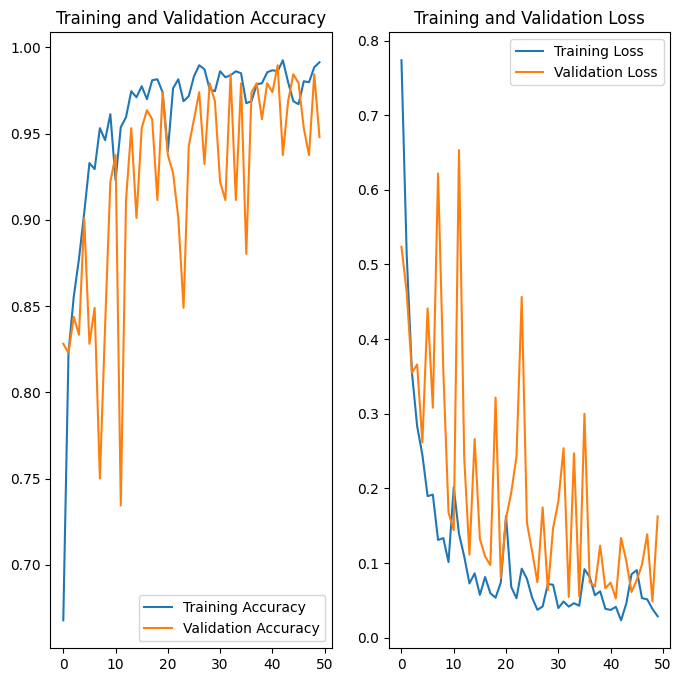

In [38]:
plt.figure (figsize=(8, 8))
plt. subplot (1, 2, 1)
plt. plot (range (EPOCHS), acc, label= 'Training Accuracy')
plt. plot (range (EPOCHS), val_acc, label= 'Validation Accuracy')
plt.legend (loc= 'lower right')

plt.title('Training and Validation Accuracy')


 

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 0s 251ms/step
predicted label: Potato___Early_blight


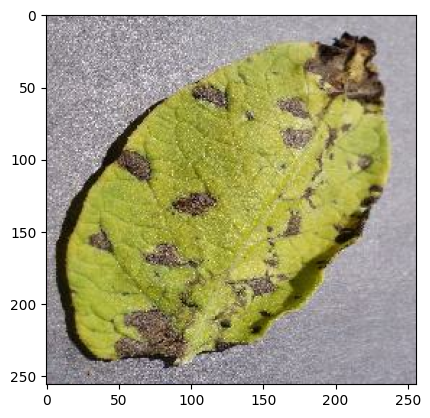

In [39]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
 first_image= images_batch[0].numpy().astype('uint8')
 first_label=labels_batch[0]

print("first image to predict")
plt. imshow(first_image)
print ("actual label:",class_names[first_label])  


batch_prediction = model. predict (images_batch)
print ("predicted label:",class_names[np. argmax(batch_prediction[0])])

In [40]:
import tensorflow as tf
import numpy as np

def predict(model, image):
    # Convert the image to a NumPy array
    img_array = tf.keras.preprocessing.image.img_to_array(image)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch

    # Make predictions using the model
    predictions = model.predict(img_array)

    
    # Get the predicted class and confidence
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * np.max(predictions[0]), 2)

    return predicted_class, confidence


1/1 [==============================] - 0s 15ms/step


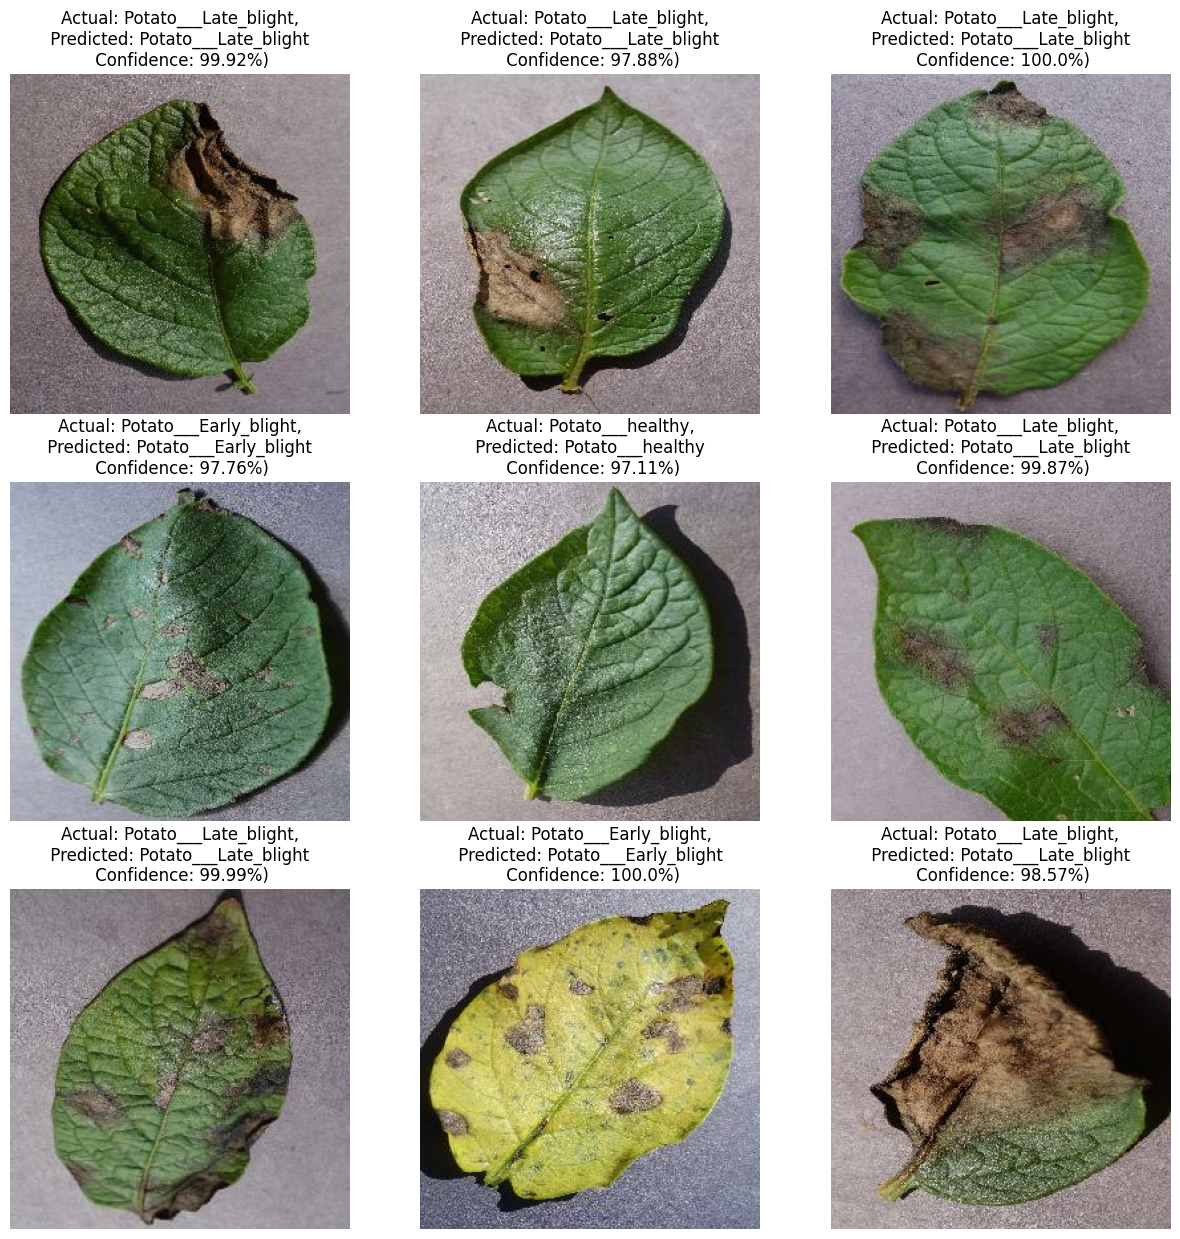

In [41]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i].numpy()]  # Use labels[i].numpy() to get the class index
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class} \n Confidence: {confidence}%)")
        plt.axis("off")
plt.show()


In [1]:
import os

# Define the directory where you want to save the model
save_directory = '/Users/nihalkumar/Downloads/potato_models/'

# Create the directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)

model_version = 2

# Save the model to the specified directory
model.save(os.path.join(save_directory, f"model_{model_version}"))



NameError: name 'model' is not defined